# Spotify Music Data Exploration and Recommender Systems Machine Learning

<b>“Music gives a soul to the universe, wings to the mind, flight to the imagination, and life to everything.” – Plato </b>

Music has been a huge part of my life even from when I was as little as 5 years old. From weekly piano lessons to listening to the radio, it is something that has shaped my upbringing and continues to be a big part of my life every day. 

However, no matter how much I study music, there are always questions that just cannot be answered without having skills beyond music. Skills like data analysis, visualizations, and machine learning. 

Questions like: 
- What are the most popular songs? 
- What makes a song unique? 
- How do we find songs that are similar to those we already like? 

The goal of this project is to practice EDA on a musical dataset to analyze trends, create recommendation systems for songs, and answer some of the questions I personally had.

## Imports and Reading in Data

In [1]:
# Data Science

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [3]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


# 1. Exploratory Data Analysis (EDA)

## 1.1 Data Cleaning

Before we do any analysis, we have to clean up our data and check for missing values.

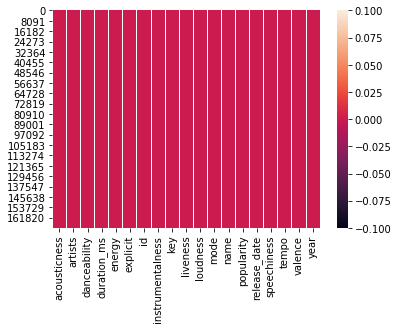

In [5]:
sns.heatmap(df.isnull())

From df.describe() we can see that the count of every column is the same, implying that there are no missing values. This is confirmed with the heatmap above, which shows that there are no null values in our data.

In our DataFrame, the artists' names are in the format of ['FirstName LastName', 'FirstName LastName']. There are a couple issues with this. 

1. While the artist names look like a list, they're actually strings.
    - We must split them into lists
2. The square brackets and single quotations marks are unnecessarry and clutter up the column.
    - We must remove them
3. Some songs have multiple artists, but they're clumped together into one entry. This can provide inaccurate data later on.
    - We must separate it so that each artist is on its own row with the song

In [6]:
df['artists'] = df['artists'].apply(lambda x: x[1:-1].split(','))
df = df.explode('artists')
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,'Carl Woitschach',0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.56300,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,'Robert Schumann',0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
1,0.9940,'Vladimir Horowitz',0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,'Seweryn Goszczyński',0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.00000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,'Francisco Canaro',0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.88700,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,0.5380,'Kygo',0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.00233,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169906,0.5380,'Oh Wonder',0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.00233,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,'Cash Cash',0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.00000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020
169907,0.0714,'Andy Grammer',0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.00000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


Next, let's drop some unnecessary data. 

For example, we don't need both 'year' and 'release_date'. We also don't need the binary features like 'explicit' and 'mode' as whether or not it's explicit has no effect on how the song listens, and the modality can be replaced by valence for our analysis. Duration_ms is also unnecessary as it doesn't affect the style of a song.

The one that may be controversial is the 'key' feature where each number maps to a key. I decided to take this out as well due to the discrete nature of it compared to the other numerical features, which are mostly continuous. Again, it is not as important in the grand scheme of things as songs can be transposed to different keys without being affected to a significant degree, at least in my opinion.

In [7]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [8]:
df.drop(['release_date', 'id', 'explicit', 'mode', 'key', 'duration_ms'], axis = 1, inplace = True)
df

,acousticness,artists,danceability,energy,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence,year
0,0.9950,'Carl Woitschach',0.708,0.1950,0.56300,0.1510,-12.428,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,'Robert Schumann',0.379,0.0135,0.90100,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
1,0.9940,'Vladimir Horowitz',0.379,0.0135,0.90100,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,'Seweryn Goszczyński',0.749,0.2200,0.00000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,'Francisco Canaro',0.781,0.1300,0.88700,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,0.5380,'Kygo',0.514,0.5390,0.00233,0.1080,-9.332,How Would I Know,70,0.1050,123.700,0.1530,2020
169906,0.5380,'Oh Wonder',0.514,0.5390,0.00233,0.1080,-9.332,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,'Cash Cash',0.646,0.7610,0.00000,0.2220,-2.557,I Found You,70,0.0385,129.916,0.4720,2020
169907,0.0714,'Andy Grammer',0.646,0.7610,0.00000,0.2220,-2.557,I Found You,70,0.0385,129.916,0.4720,2020


## 1.2 Data Exploration

### 1.2.1 General Trends/Distributions

Now that we are done with the cleaning, we can have some fun exploring our data. To start off, let's take a look at how the features of data are actually distributed.

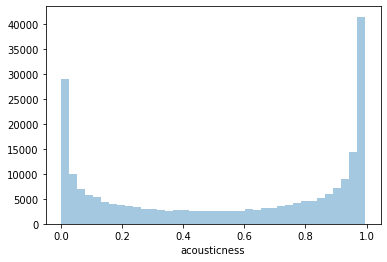

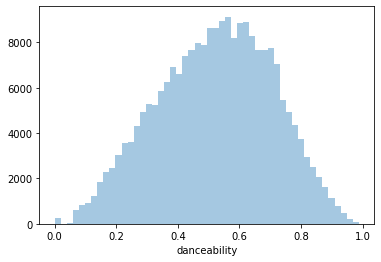

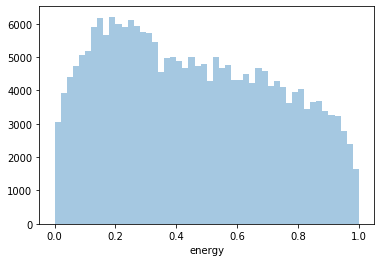

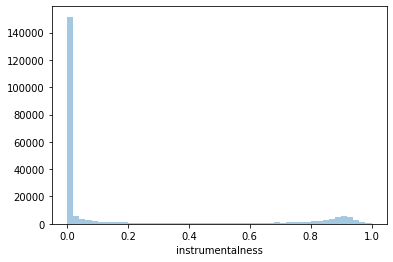

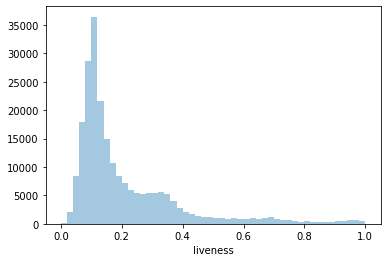

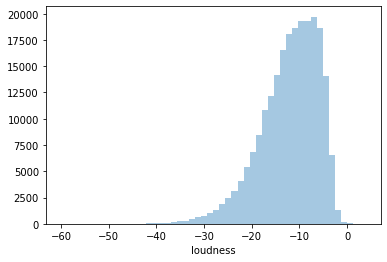

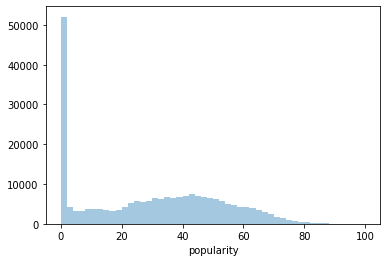

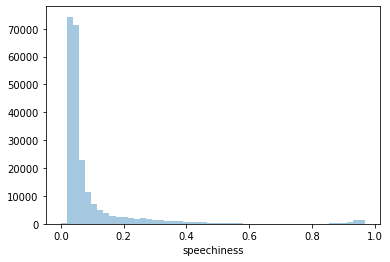

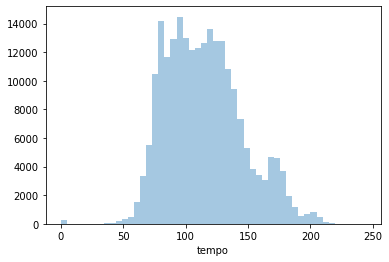

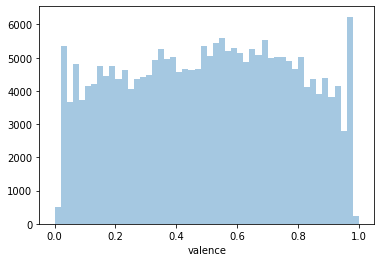

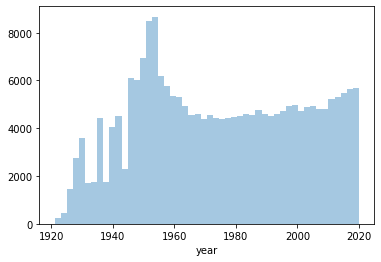

In [9]:
features = ['acousticness', 'danceability', 'energy',
        'instrumentalness', 'liveness', 'loudness',
        'popularity', 'speechiness', 'tempo',
       'valence', 'year']
for feat in features:
    plt.figure()
    sns.distplot(df[feat], kde = False)

Some interesting takeaways:

- For some of the features (acousticness, instrumentalness, speechiness) the data almost mimics that of a binary graph


- Very few features are evenly distributed (energy, valence)


- More graphs are left skewed (speechiness, popularity, liveness) compared to right skewed (loudness)


- Only one seems to even remotely resemble a normal distribution (danceability) although this is kind of a stretch

Next, let's take a look at the correlations between the features.

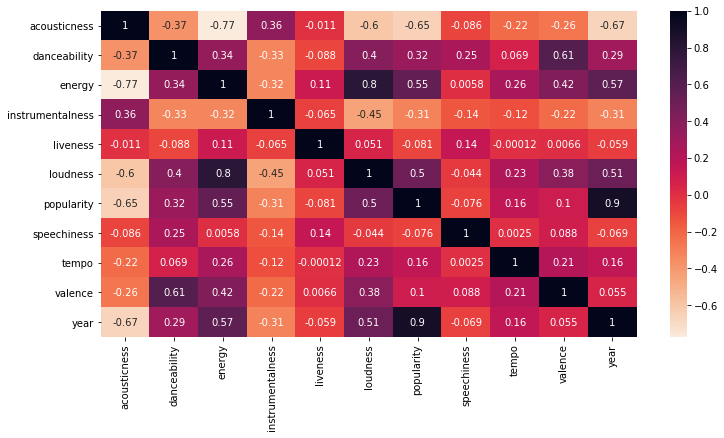

In [10]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'rocket_r')

As we can see, there are a few correlations to note: 

1. There is a strong correlation between loudness and energy. This makes sense, as louder songs do tend to be more intense and have more activity.
2. There is a strong correlation between year and popularity. This may seem surprising at first, but it makes sense as Spotify is technically a pretty modern app, with many of its users being fairly young. Since people generally tend to listen to the music of their generation, it makes sense for more modern songs to be more popular with the majority of the audience.

Let's visualize these two observations.

<Figure size 432x288 with 0 Axes>

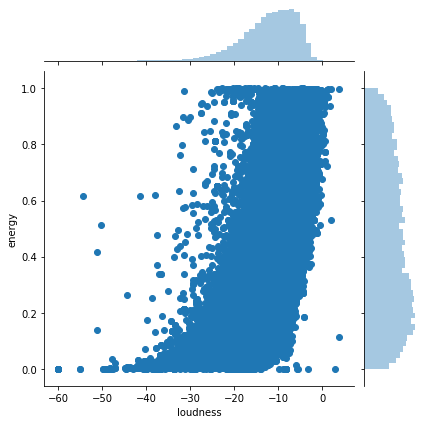

<Figure size 432x288 with 0 Axes>

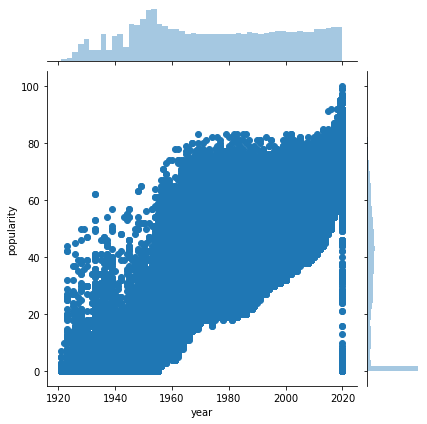

In [11]:
plt.figure()
sns.jointplot(x = 'loudness', y = 'energy', data = df)
plt.figure()
sns.jointplot(x = 'year', y = 'popularity', data = df)

Just as we observed before, we can see a definitive correlation between the pairs of features. We can also estimate/confirm that the correlation between year and popularity are more clear to see. This makes sense as this pair has a higher correlation compared to loudness and energy.

### 1.2.2 Top Charts

Moving on, let's take a look at some top charts. To start off, let's see what the most popular songs on Spotify are. We will use the popularity rating that is integrated in our data already.

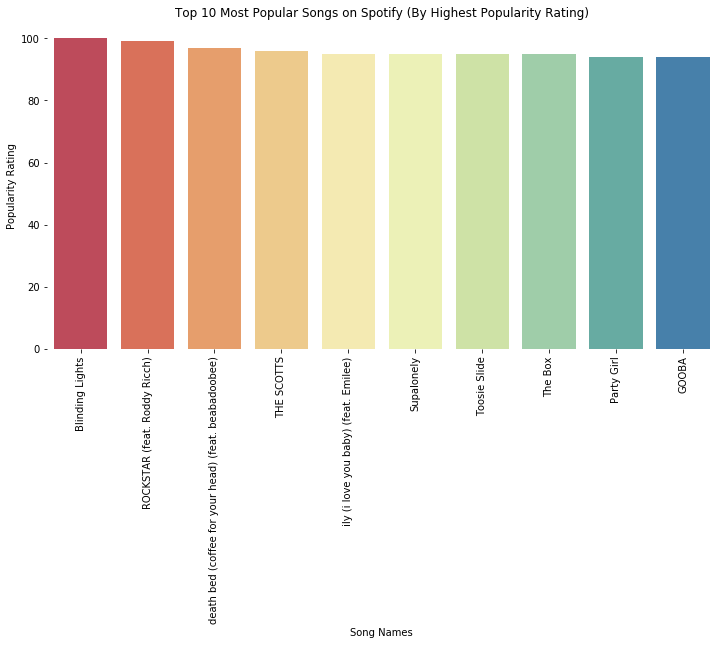

In [12]:
plt.figure(figsize = (12, 6))
mostPopularSong = df.groupby(by='name')['popularity'].max().sort_values(ascending=False).head(10)
mostPopularSongPlot = sns.barplot(x = mostPopularSong.index, y = mostPopularSong, palette = 'Spectral')
mostPopularSongPlot.set_xlabel('Song Names')
mostPopularSongPlot.set_ylabel('Popularity Rating')
mostPopularSongPlot.set_title('Top 10 Most Popular Songs on Spotify (By Highest Popularity Rating)')
plt.xticks(rotation = 90)
sns.despine(left = True, bottom = True)

It seems strange that such a recent song like Blinding Lights is the most popular song. Let's delve deeper and see if the data has a recency bias. Let's group our data by year and plot the max popularity of each year's most popular song in a line graph.

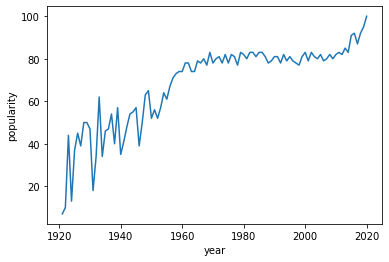

In [13]:
popByYear = df.groupby('year')['popularity'].max()
sns.lineplot(x = popByYear.index, y = popByYear)

As we can see, there is definitely a trend here where more recent songs have a higher popularity rating. Again, this can be attributed to the younger audience that uses Spotify, who are more likely to listen to the current most popular songs.

Next, let's see who the 10 most popular artists are. There are several ways to approach this, we will sort using total popularity as a sum of the popularity of all their songs.

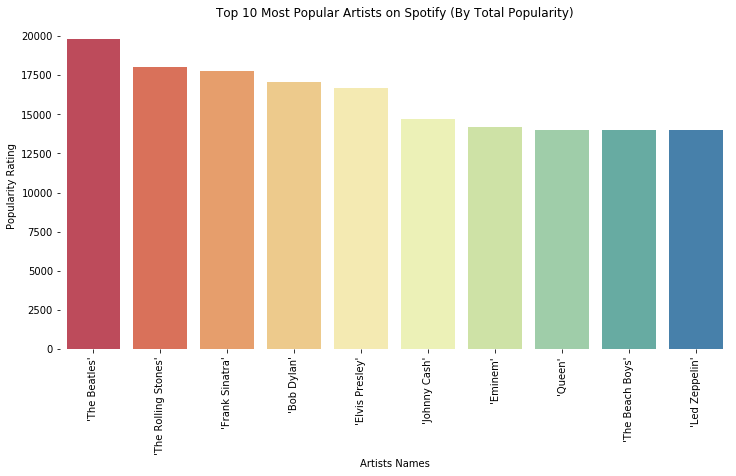

In [14]:
plt.figure(figsize = (12, 6))
mostPopularArtist = df.groupby(by='artists')['popularity'].sum().sort_values(ascending=False).head(10)
mostPopularArtistPlot = sns.barplot(x = mostPopularArtist.index, y = mostPopularArtist, palette = 'Spectral')
mostPopularArtistPlot.set_xlabel('Artists Names')
mostPopularArtistPlot.set_ylabel('Popularity Rating')
mostPopularArtistPlot.set_title('Top 10 Most Popular Artists on Spotify (By Total Popularity)')
plt.xticks(rotation = 90)
sns.despine(left = True, bottom = True)

This is starting to make more sense. It would be almost insulting to not see The Beatles on top as they have been, without question, one of the most popular and influential bands of all time. 

Additionally, it is also interesting to see how many of the top 10 are actually bands. One possible explanation for this may be that bands tend to release more songs than singular artists. 

Another observation is that almost all the artists on this list were active mostly in the past. Compared to some of the most popular artists of today, they have already produced all of their songs, while the artists of today still have many more to make. If this is the case, then we can expect to see popular artists like Drake and The Weeknd rise up in the ranks in the future.



I've always wondered who the artists with the most songs were. Let's use our data from Spotify to find out. 

Disclaimer: This is not who has the most songs of all time, as the data is from Spotify.

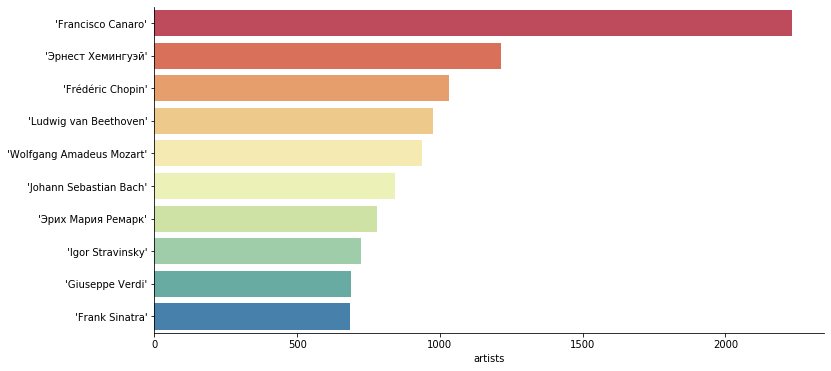

In [15]:
plt.figure(figsize = (12, 6))
MostSongs = df['artists'].value_counts().head(10)
sns.barplot(x = MostSongs, y = MostSongs.index, palette = 'Spectral')
sns.despine(right = True)

Wow! It looks like Francisco Canaro has by far the most number of music on Spotify, almost twice as much as the next artist. 

We also see some classical composers on the list which is always nice to see. Surprisingly, we do not see Franz Joseph Haydn on the list as he was known to write an absurd amount of music, including 107 symphonies compared to Mozart's 41. However, this is probably due to the amount of covers on Spotify, and compared to some of the other famous composers, Haydn's work may be considered less popular.

### 1.2.3 Trends Through the Ages

Finally, let's analyze some trends through the years, or <b>decades</b>. To do this, we will need to create a function to specifically separate the entries into decades based on the 'year' column.

In [16]:
def decadeify (year):
    if year < 1930:
        return '1920s'
    elif year < 1940:
        return '1930s'
    elif year < 1950:
        return '1940s'
    elif year < 1960:
        return '1950s'
    elif year < 1970:
        return '1960s'
    elif year < 1980:
        return '1970s'
    elif year < 1990:
        return '1980s'
    elif year < 2000:
        return '1990s'
    elif year < 2010:
        return '2000s'
    elif year < 2020:
        return '2010s'
    else:
        return '2020s'

In order to use our function on our data, we will need to utilize the built-in apply function with a lambda expression to provide the argument that we pass in.

In [17]:
df['decade'] = df['year'].apply(lambda x: decadeify(x))
df.head()

,acousticness,artists,danceability,energy,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence,year,decade
0,0.995,'Carl Woitschach',0.708,0.1950,0.563,0.1510,-12.428,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,1920s
1,0.994,'Robert Schumann',0.379,0.0135,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,1920s
1,0.994,'Vladimir Horowitz',0.379,0.0135,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,1920s
2,0.604,'Seweryn Goszczyński',0.749,0.2200,0.000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,1920s
3,0.995,'Francisco Canaro',0.781,0.1300,0.887,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,1920s


Let's check out what the most popular songs of each decade are. To do this, we will again use the groupby function, except this time with our new 'decade' column.

In [18]:
feats = ['decade', 'artists', 'name', 'popularity']
df[feats].sort_values(by = 'popularity', ascending = False).groupby('decade').first()

,artists,name,popularity
decade,,,
1920s,'Benny Goodman',"Sing, Sing, Sing",50
1930s,'Billie Holiday',All of Me (with Eddie Heywood & His Orchestra),62
1940s,'Erik Satie',Gymnopédie No. 1,65
1950s,'Chuck Berry',Johnny B. Goode,74
1960s,'The Beatles',Here Comes The Sun - Remastered 2009,83
1970s,'AC/DC',Highway to Hell,83
1980s,'The Police',Every Breath You Take,83
1990s,'Radiohead',Creep,82
2000s,'Linkin Park',In the End,83


Wow! This is very interesting. Evidently, these results make sense to me as even though I mostly listen to the popular songs of our current time, I know nearly all of the songs listed. That really is a testament to the timelessness of the most popular songs in history.

Additionally, this confirms our previous result of the most popular song on Spotify being Blinding Lights - The Weeknd.

Lastly, let's take a look at how the features fared through the ages. For the purposes of scale, we will keep tempo separate from the rest of the features. I chose not to scale the values for the features as they are not directly comparable anyway. This will, however, give us an idea for how the features change over time.

I also chose to exclude loudness as the values can become negative. We can also kind of base it off the energy feature anyway as the two are highly correlated.

Text(0, 0.5, 'Values')

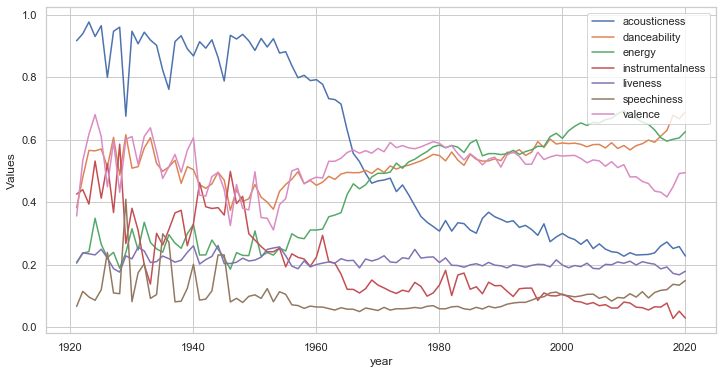

In [19]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
            'speechiness', 'valence']
plt.figure(figsize = (12, 6))
sns.set(style = 'whitegrid')
for feat in features:
    feat_data = df.groupby('year')[feat].mean()
    sns.lineplot(x = feat_data.index, y = feat_data, label = feat)
plt.legend(loc = 'upper right')
plt.ylabel('Values')

It is clearly that there have been some dramatic changes for some features.

1. Acousticness decreased drastically. This can be attributed to the rise in rap and rock music in recent times.

2. Analagous to the previous point, energy also increased significantly. This makes sense as rap and rock music tend to be high energy.

3. The other features have stayed somewhat consistent through the years, this makes sense as the features in question are as timeless as music itself

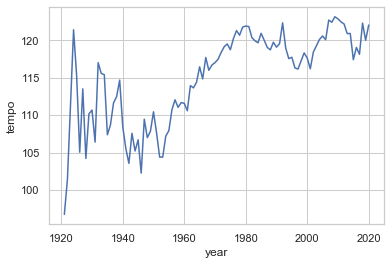

In [20]:
sns.lineplot(x = df.groupby('year')['tempo'].mean().index, y = df.groupby('year')['tempo'].mean())

We can see a dramatic increase in the tempo of music suddenly in the early 1920s, only to suddenly drop off soon after. We can also see a clear upwards trend in tempo as we get to more recent years. This also makes sense as music nowadays tend to be faster paced and higher energy.

# 2. Machine Learning

Machine learning allows us to learn from user or song data and build models that predict other songs that a user might like. This type of machine learning system is known as a <b>recommender system</b>.

Recommender systems are found everywhere, especially online. Many companies that provide personalized services such as Amazon, Facebook, Netflix, and Spotify use these systems to suggest what we might also want. They do this through the vast amounts of data on our shopping/watching/listening patterns and build models to predict what we could also like based on our behaviour.

## 2.1 Theory

### 2.1.1 Overview

<b>There are 2 common types of recommender systems.</b>

1. Content-Based: Focuses on attributes of items (songs) and recommends based on similarity
    - e.g. Term Frequency-Inverse Document Frequency (TF-IDF): Counting occurrences of words and Weighing the importance of words to calculate a score
    - Less common
2. Collaborative Filtering: Focuses on wisdom of the crowd, recommends based on other users
    - Memory-based:
        - user-item filtering:
            - Recommends items based on likes of similar users (from similarity of rating) to current user
            - "Users who rate similar to you also liked..."
        - item-item filtering:
            - Recommends items based on likes of similar users (from others who also liked current item) to current user
            - "Users who liked this item also liked..."
        - In both cases, 2 user-item matrices are built from the dataset
            - Training matrix, Testing matrix (equal sizes)
                - Training matrix will have a higher proportion of the total ratings
    - Model-based:
        - Matrix factorization:
            - Preferences of a user can be determined by a small number of hidden factors
            - Reduce dimensions and optimize
        - Non-parametric:
            - K-Nearest Neighbours (A type of machine learning algorithm)
            - Unsupervised model
            - K represents limit of number of similar users
        - Deep Learning:
            - Building neural nets with linear/non-linear layers

## 2.2 Simple Correlation Model

For our first model, let's use a pandas built-in functionality known as pandas.DataFrame.corrwith() to find the recommendations. 

How this works is, by calling the corrwith function on a DataFrame with all songs and the values of their features, we will be able to get a general correlation coefficient for each song. By then sorting the list by highest correlation, we can extract a list of most similar movies as recommendations.

### 2.2.1 DataFrame Cleaning and Building

To do this, we will need to convert our DataFrame with all the data we read in to a DataFrame with all the songs as columns and features as rows. The data will then be each song's rating for each feature.

In [22]:
df = pd.read_csv('data.csv')
# Omitting unnecessary features
ft = df[['name', 'artists', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness', 'tempo', 'valence']]
# Removing unnecessary clutter in artist names and combining song name with artist name
ft['artists'] = ft['artists'].apply(lambda x: x[1:-1])
ft['artists'] = ft['artists'].apply(lambda x: x.replace("'", ""))
ft['name'] = ft['name'] + ' - ' + ft['artists']
ft.drop('artists', axis = 1, inplace = True)
# Convert song and artist name from column to index
ft.set_index('name', inplace = True)
# Scale tempo data as other features are [0,1] while tempo is much higher than that
scaler = MinMaxScaler()
# The reshape here just makes the 1-D data into 2-D so that fit_transform can use it
scaled = scaler.fit_transform(ft['tempo'].values.reshape(-1,1))
# Replace old tempo data with scaled
ft['tempo'] = scaled
# Switch columns and indices so that features are indices and names are columns
ft = ft.transpose()
# Checks if columns names are duplicate and returns a boolean value of True if has appeared previously
# We invert all the boolean values so that we can keep the first instance (previously False values)
# Finally, use .loc to select non-duplicated columns
ft = ft.loc[:,~ft.columns.duplicated()]
ft

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

name,Singende Bataillone 1. Teil - Carl Woitschach,"Fantasiestücke, Op. 111: Più tosto lento - Robert Schumann, Vladimir Horowitz",Chapter 1.18 - Zamek kaniowski - Seweryn Goszczyński,Bebamos Juntos - Instrumental (Remasterizado) - Francisco Canaro,"Polonaise-Fantaisie in A-Flat Major, Op. 61 - Frédéric Chopin, Vladimir Horowitz","Scherzo a capriccio: Presto - Felix Mendelssohn, Vladimir Horowitz","Valse oubliée No. 1 in F-Sharp Major, S. 215/1 - Franz Liszt, Vladimir Horowitz",Per aspera ad astra - Carl Woitschach,"Moneda Corriente - Remasterizado - Francisco Canaro, Charlo",Chapter 1.3 - Zamek kaniowski - Seweryn Goszczyński,...,"Wet Em Up Pt. 2 - Lil Tjay, Sheff G, Sleepy Hallow",Fine By Time - YoungBoy Never Broke Again,Rough Ryder - YoungBoy Never Broke Again,I Dare You - Kelly Clarkson,"Letter To Nipsey (feat. Roddy Ricch) - Meek Mill, Roddy Ricch","Ojos De Maniaco - LEGADO 7, Junior H","Skechers (feat. Tyga) - Remix - DripReport, Tyga","Sweeter (feat. Terrace Martin) - Leon Bridges, Terrace Martin","How Would I Know - Kygo, Oh Wonder","I Found You - Cash Cash, Andy Grammer"
acousticness,0.995000,0.994000,0.604000,0.99500,0.990000,0.995000,0.956000,0.98800,0.995000,0.846000,...,0.027400,0.254000,0.371000,0.045200,0.264000,0.210000,0.173000,0.016700,0.538000,0.071400
danceability,0.708000,0.379000,0.749000,0.78100,0.210000,0.424000,0.444000,0.55500,0.683000,0.674000,...,0.701000,0.506000,0.623000,0.655000,0.744000,0.795000,0.875000,0.719000,0.514000,0.646000
energy,0.195000,0.013500,0.220000,0.13000,0.204000,0.120000,0.197000,0.42100,0.207000,0.205000,...,0.645000,0.787000,0.721000,0.719000,0.702000,0.585000,0.443000,0.385000,0.539000,0.761000
instrumentalness,0.563000,0.901000,0.000000,0.88700,0.908000,0.911000,0.435000,0.83600,0.206000,0.000000,...,0.000174,0.000000,0.000000,0.000018,0.000000,0.000001,0.000032,0.031300,0.002330,0.000000
speechiness,0.050600,0.046200,0.929000,0.09260,0.042400,0.059300,0.040000,0.04740,0.127000,0.954000,...,0.164000,0.161000,0.339000,0.036800,0.288000,0.037400,0.143000,0.040300,0.105000,0.038500
tempo,0.485348,0.344019,0.439086,0.44247,0.254614,0.260235,0.329775,0.50518,0.490936,0.332864,...,0.442274,0.409503,0.682684,0.508147,0.376437,0.399355,0.409732,0.524395,0.506778,0.532244
valence,0.779000,0.076700,0.880000,0.72000,0.069300,0.266000,0.305000,0.85700,0.493000,0.759000,...,0.576000,0.333000,0.719000,0.435000,0.338000,0.934000,0.306000,0.270000,0.153000,0.472000


### 2.2.2 Recommendation Function

For the actual function, we will pass in 2 parameters: song title + artist name, and the DataFrame with all the data. 

The function will take the song and call the corrwith function on it to get the correlation coefficient between the song and all the other songs in the DataFrame. 

The newly generated table will consist of all songs and their correlation coefficient with the input song, and we will sort this table by descending order of correlation coefficients to get the most similar songs as recommendations.

In [23]:
def findRecommendations (title, df):
    song = df[title]
    similar_to_song = df.corrwith(song)
    corr = pd.DataFrame(similar_to_song,columns=['Correlation'])
    corr.dropna(inplace=True)
    corr.sort_values('Correlation',ascending=False, inplace = True)
    return corr[1:].head()

### 2.2.3 Testing Recommendation System

In [27]:
findRecommendations('I Love It (& Lil Pump) - Kanye West, Lil Pump', ft)

,Correlation
name,
"U and Dat (feat. T. Pain & Kandi Girl) - E-40, T-Pain, Kandi Girl",0.998157
Couldn't Be A Better Playa - Lil Jon & the Eastside Boyz Feat. T - Lil Jon & The East Side Boyz,0.996460
Ya Digg - Frostydasnowmann,0.995754
The Big Payback - EPMD,0.995753
Boot It Up - Shoreline Mafia,0.995695


In [30]:
findRecommendations('Polonaise-Fantaisie in A-Flat Major, Op. 61 - Frédéric Chopin, Vladimir Horowitz', ft)

,Correlation
name,
Hafızın Kabri olan Bahçede - Münir Nurettin Selçuk,0.999772
Segments - Robert Farrugia,0.999353
The Nearness Of You - Jackie Gleason,0.999151
"Addio, amore mio - Piero Piccioni",0.999105
"Piano Sonata No. 21 in C Major, Op. 53 ""Waldstein"": I. Allegro con brio - Ludwig van Beethoven, Claudio Arrau",0.999049


In [70]:
findRecommendations('Sweater Weather - The Neighbourhood', ft)

,Correlation
name,
最後的戰役 - Jay Chou,0.999724
Gonna Get Ya - Pete Townshend,0.999720
Mystify - INXS,0.999593
Red Rain - 2012 Remaster - Peter Gabriel,0.999546
Wherever You Will Go - The Calling,0.999540


### 2.2.4 Observations and Insights

After comparing the input song with the recommended songs by ear, I noticed distinct patterns that emerged such as similar tempo and sound. The cool thing I noticed was that this system doesn't care about where the music is from, whether it's Western or Asian as you can see above. As long as the metrics are similar, they will be recommended. 

This made me realize that music is without borders. Songs from completely different backgrounds and cultures can often have similar features that one might not notice just from seeing the titles and artists. 

This project not only showed what is possible with data science and recommendations, but also gave me some perspective on music itself which has nothing to do with analysis. I will definitely be listening to more international and older music now that I realize that one's musical tastes are not bounded by region/culture, nor time itself.

In [72]:
# To be continued with more complicated models that utilize machine learning